In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in last_date:
    split_last_date=date.split('-')
split_last_date
last_year=int(split_last_date[0]); last_month=int(split_last_date[1]); last_day=int(split_last_date[2])

In [12]:
query_date=dt.date(last_year, last_month, last_day)-dt.timedelta(days=365)
print(query_date)

2016-08-23


In [13]:
lyprcp=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=query_date).order_by(Measurement.date).all()

In [14]:
lyprcp=pd.DataFrame(lyprcp, columns=['date','prcp'])

In [15]:
lyprcp=lyprcp.dropna()

In [16]:
#yprcp.set_index('date',inplace=True)
lyprcp.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [19]:
x=lyprcp['date'].tolist()
y=lyprcp['prcp'].tolist()

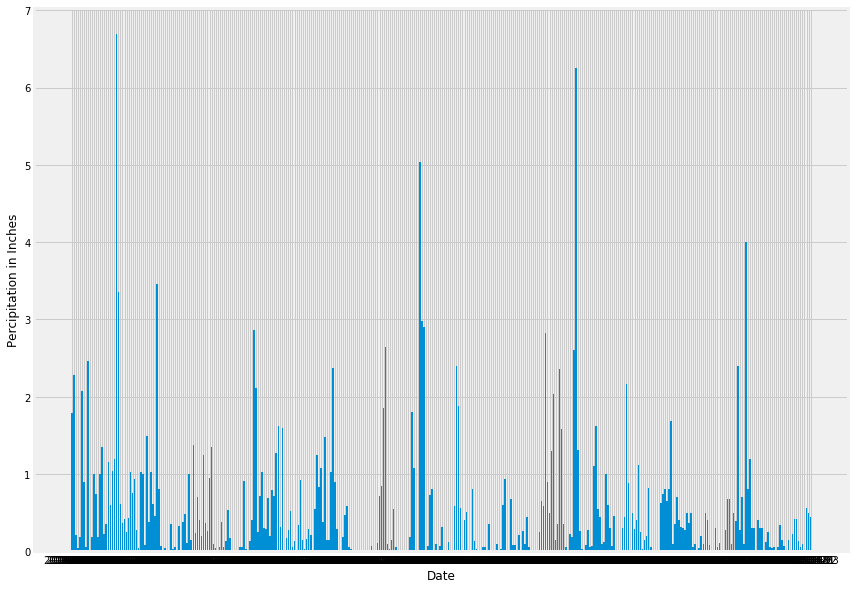

In [20]:
plt.figure(figsize=[13,10])
plt.xlabel("Date")
plt.ylabel("Percipitation in Inches")
plt.bar(x,y)
plt.show()

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [21]:
lyprcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [36]:
stations_available = session.query(Station).filter(Station.id).count()
print("There are {} stations available in this dataset".format(stations_available))

There are 9 stations available in this dataset


In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [38]:
stationActivity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stationActivity = pd.DataFrame(data=stationActivity, columns=['Station', 'Count'])
stationActivity

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [40]:
lowTemp = session.query(Measurement.station, func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
lowTemp

[(u'USC00519281', 54.0)]

In [41]:
hiTemp = session.query(Measurement.station, func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
hiTemp

[(u'USC00519281', 85.0)]

In [44]:
avgTemp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
avgTemp

[(u'USC00519281', 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [53]:
hiTemps = session.query(Measurement.tobs)\
.filter( Measurement.date >= query_date).filter(Measurement.station == 'USC00519281').all()
hiTemps=hiTemps = pd.DataFrame(hiTemps, columns=['tobs'])

<Figure size 288x288 with 0 Axes>

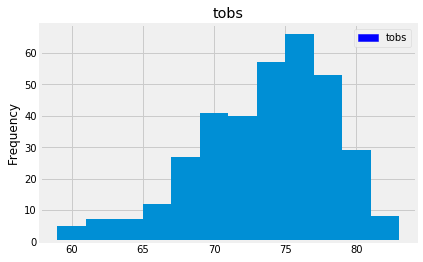

In [54]:
import matplotlib.patches as mpatches

my_dpi=800

plt.figure(figsize=(2, 2), dpi=144)

hiTemps[hiTemps['tobs'] >= 0].hist(bins=12)

red_patch = mpatches.Patch(color='blue', label='tobs')
plt.legend(handles=[red_patch])
plt.ylabel("Frequency")
plt.show()

![precipitation](Images/station-histogram.png)

In [55]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [62]:
trip_start = '2016-02-28'
trip_end = '2017-03-05'
myTrip = calc_temps(trip_start, trip_end)
myTrip

[(59.0, 74.11674478057094, 84.0)]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


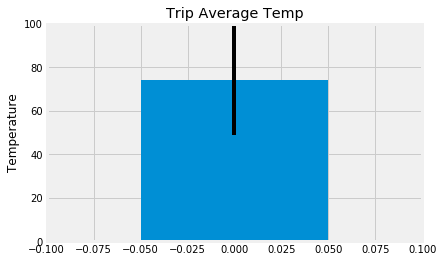

In [67]:
y = [myTrip[0][1]]
x = 0
yerr_val = myTrip[0][2] - myTrip[0][0]
fig, ax = plt.subplots()
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temp")
ax.bar(x, y, width=.1, yerr=yerr_val)
ax.set_xlim(-.1, .1)
ax.set_ylim(0, 100)
ax.set_xbound(lower=-.1, upper=.1)
ax.tick_params(axis='x') 
plt.show()